In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
plt.rcParams["font.family"] = 'BM YEONSUNG'
#plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

## 문제 1.

In [127]:
D=pd.read_excel('https://data.hossam.kr/D02/kings_life.xlsx')
data=pd.DataFrame(D)

데이터 탐색

In [128]:
data.dtypes

왕     object
수명     int64
dtype: object

In [129]:
data.rename(columns=dict(zip(data.columns,["K","Y"])),inplace=True)

기술통계량

In [130]:
data["Y"].median()

45.0

In [131]:
data["Y"].agg(["min","mean","max","std"])

min     16.000000
mean    46.037037
max     82.000000
std     16.173296
Name: Y, dtype: float64

boxplot

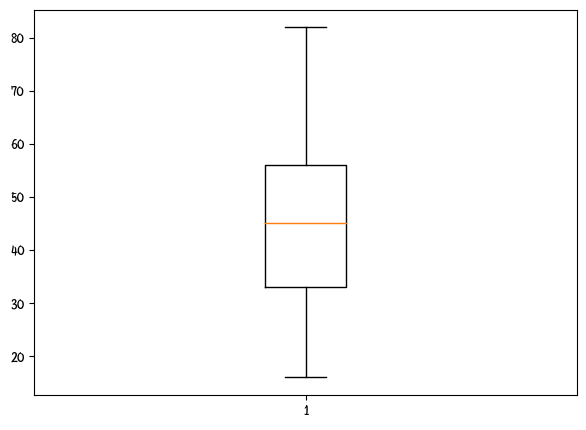

In [132]:
plt.rcParams["figure.figsize"]=(7,5)
plt.figure()
plt.boxplot(x=data["Y"])
plt.show()

1. 중앙값 - 평군값의 차이가 작음 

### 문제 2

In [133]:
D=pd.read_excel('https://data.hossam.kr/D02/stock.xlsx')
data=pd.DataFrame(D)

In [134]:
data["구분"]=data.구분.astype("category")
data.groupby(["구분"]).agg(["min","mean","max","std"])

주가                            
    min        mean  max        std
구분                                 
F   120  155.166667  235  27.764704
K   102  150.833333  173  21.425700

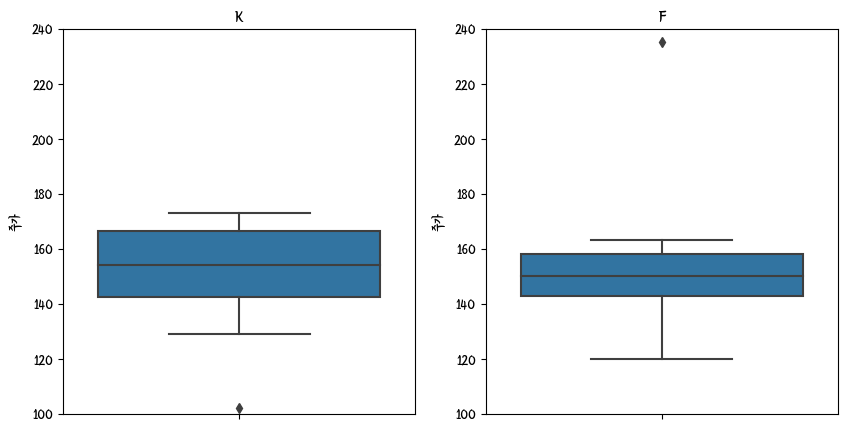

In [135]:
plt.rcParams["figure.figsize"]=(10,5)
f,(a0,a1)=plt.subplots(1,2)
sb.boxplot(y=data.query("구분=='K'")["주가"],ax=a0)
a0.title.set_text("K")
a0.set_ylim(100,240)
sb.boxplot(y=data.query("구분=='F'")["주가"],ax=a1)
a1.title.set_text("F")
a1.set_ylim(100,240)
plt.show()

### 문제3.

In [136]:
D=pd.read_excel("https://data.hossam.kr/D02/grape.xlsx")
data=pd.DataFrame(D)

In [137]:
data.set_index("비료종류",inplace=True)

In [1]:
data.loc["A"]["수확량"].discribe

NameError: name 'data' is not defined

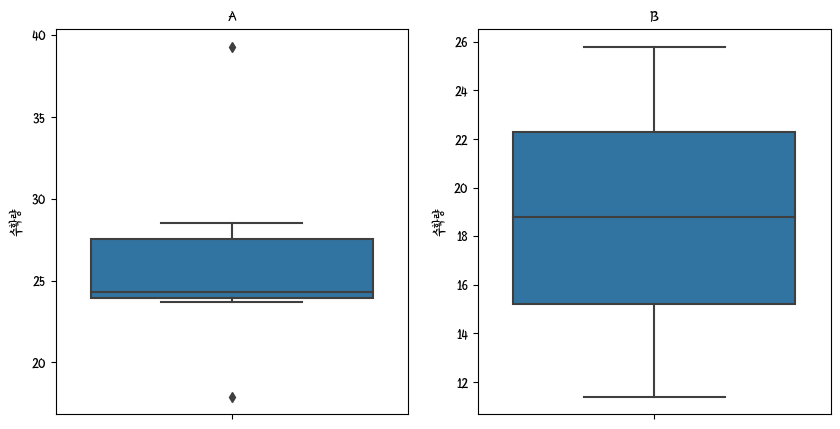

In [139]:
plt.rcParams["figure.figsize"]=(10,5)
f,(a0,a1)=plt.subplots(1,2)
sb.boxplot(y=data.loc["A"]["수확량"],ax=a0)
a0.title.set_text("A")
sb.boxplot(y=data.loc["B"]["수확량"],ax=a1)
a1.title.set_text("B")
plt.show()

### 문제4

In [140]:
D=pd.read_excel('https://data.hossam.kr/D02/analysis_grade.xlsx')
data=pd.DataFrame(D)

In [141]:
data['학과']=data.학과.astype("category")

In [142]:
data.groupby('학과').describe()

점수                                                      
   count       mean        std   min    25%   50%    75%   max
학과                                                            
A   20.0  43.750000  20.229928  10.0  29.50  42.5  55.00  78.0
C   12.0  56.166667  14.689720  41.0  50.25  52.5  54.25  90.0

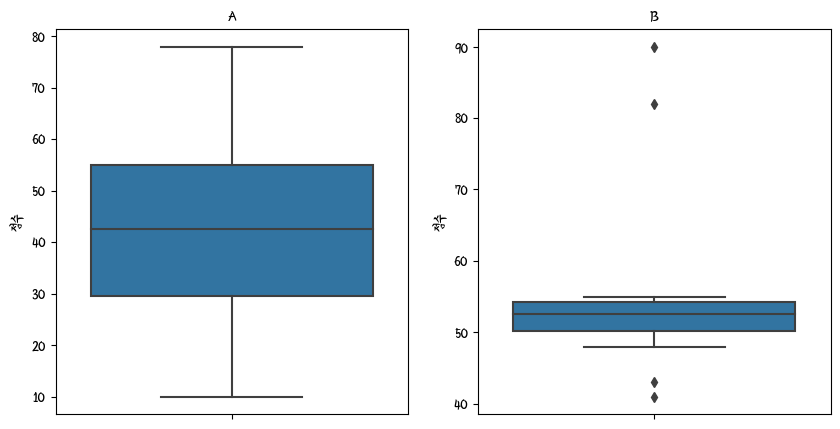

In [143]:
plt.rcParams["figure.figsize"]=(10,5)
f,(a0,a1)=plt.subplots(1,2)
sb.boxplot(y=data.query("학과=='A'")["점수"],ax=a0)
a0.title.set_text("A")
sb.boxplot(y=data.query("학과=='C'")["점수"],ax=a1)
a1.title.set_text("B")
plt.show()

### 문제 5.

In [5]:
D=pd.read_excel("https://data.hossam.kr/D02/stat_comp_grade.xlsx")
data=pd.DataFrame(D)

In [6]:
data.groupby("전공").describe()

중간고사                                                      기말고사  \
     count       mean        std   min   25%   50%   75%   max count   
전공                                                                     
COMP   8.0  65.625000  18.423103  31.0  58.0  70.5  77.0  87.0   8.0   
STAT  12.0  64.833333  21.225342  34.0  47.0  67.5  80.5  94.0  12.0   

                                                            
           mean        std   min    25%   50%    75%   max  
전공                                                          
COMP  74.875000  18.795421  40.0  65.25  81.5  86.25  96.0  
STAT  76.166667  13.953386  53.0  67.50  78.5  85.25  95.0

In [7]:
#문제1
data['전공']=data["전공"].apply(lambda x: 1 if x=="STAT" else 2)

In [8]:
#문제2
print(data.filter(["전공",'중간고사']).describe())
print(data.filter(["전공",'기말고사']).describe())

              전공       중간고사
count  20.000000  20.000000
mean    1.400000  65.150000
std     0.502625  19.647619
min     1.000000  31.000000
25%     1.000000  48.500000
50%     1.000000  67.500000
75%     2.000000  78.500000
max     2.000000  94.000000
              전공       기말고사
count  20.000000  20.000000
mean    1.400000  75.650000
std     0.502625  15.597824
min     1.000000  40.000000
25%     1.000000  66.000000
50%     1.000000  79.000000
75%     2.000000  85.250000
max     2.000000  96.000000


1. 기말고사 평균-중간고사 평균>13
2. 중간고사 std > 기말고사 std

In [9]:
#문제3.
ct1,rg1=np.histogram(data.filter(["중간고사"]),bins=4)
ct2,rg2=np.histogram(data.filter(["기말고사"]),bins=4)

In [10]:
Rg1=[f"{rg1[i]}~{rg1[i+1]}" for i in range(len(rg1)-1)]
Rg2=[f"{rg2[i]}~{rg2[i+1]}" for i in range(len(rg2)-1)]

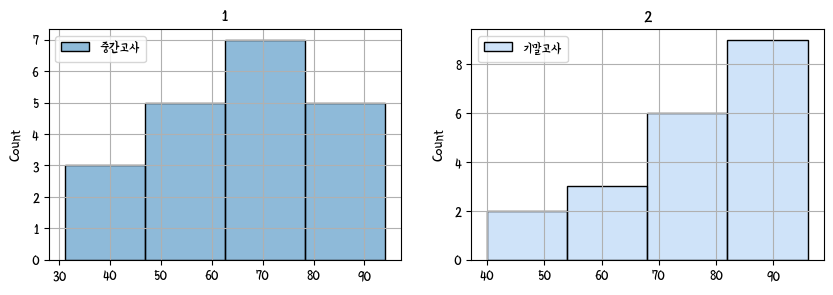

In [11]:
#문제3.
plt.rcParams["figure.figsize"]=(10,3)
f,(a0,a1)=plt.subplots(1,2)
sb.histplot(data=data.filter(["중간고사"]),
            bins=4,ax=a0)
a0.grid()
a0.title.set_text("1")
a1.grid()
sb.histplot(data=data.filter(["기말고사"]),
            bins=4,ax=a1,palette="pastel")
a1.title.set_text("2")
plt.show()

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_2728\4154601363.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.histplot(data=data.loc[data["전공"]==1]["기말고사"],
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_2728\4154601363.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.histplot(data=data.loc[data["전공"]==2]["기말고사"],


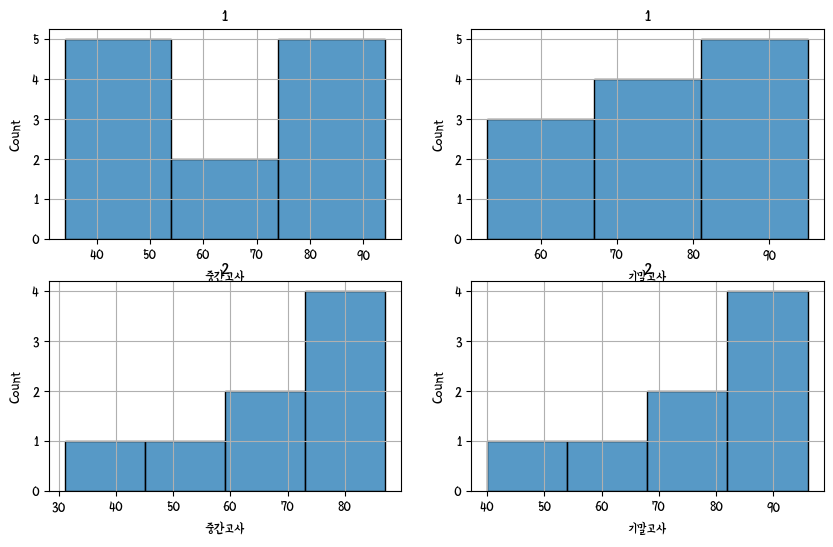

In [19]:
#문제4.
plt.rcParams["figure.figsize"]=(10,6)
f,((a0,a1),(b0,b1))=plt.subplots(2,2)
a0.grid()
sb.histplot(data=data.loc[data["전공"]==1]["중간고사"],
            bins=3,ax=a0)
a0.title.set_text("1")
a1.grid()
sb.histplot(data=data.loc[data["전공"]==1]["기말고사"],
            bins=3,ax=a1,palette="pastel")
a1.title.set_text("1")

b0.grid()
sb.histplot(data=data.loc[data["전공"]==2]["중간고사"],
            bins=4,ax=b0)
b0.title.set_text("2")
b1.grid()
sb.histplot(data=data.loc[data["전공"]==2]["기말고사"],
            bins=4,ax=b1,palette="pastel")
b1.title.set_text("2")


plt.show()